In [62]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
p_coupling_paleo = np.genfromtxt('p_coupling_paleo.txt')
p_coupling_st_volc_paleo = np.genfromtxt('p_coupling_st_volc_paleo.txt')
p_coupling_paleo_pdo = np.genfromtxt('p_coupling_paleo_pdo_biondi.txt')
p_coupling_st_volc_paleo_pdo = np.genfromtxt('p_coupling_st_volc_paleo_pdo_biondi.txt')

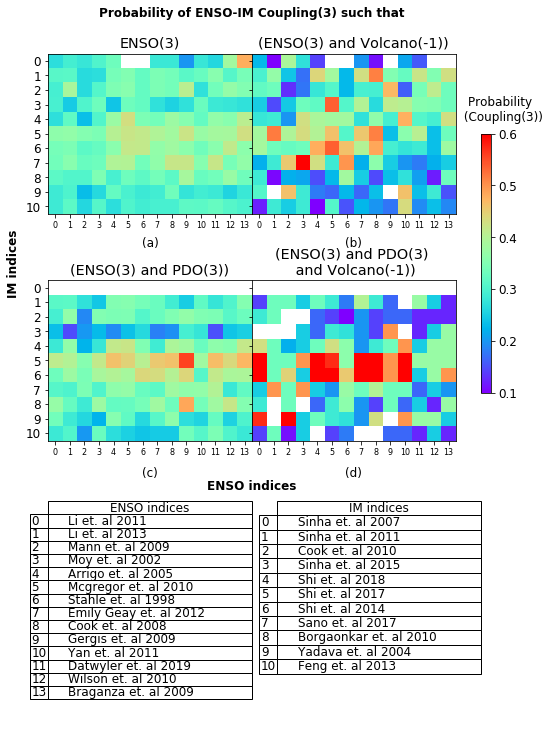

In [63]:
lag=4
import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 

font = {'family' : 'normal',
        'size'   : 12}

xticklabels = ['Li et. al 2011', 'Li et. al 2013', 'Mann et. al 2009', 'Moy et. al 2002', \
              'Arrigo et. al 2005', 'Mcgregor et. al 2010', 'Stahle et. al 1998', 'Emily Geay et. al 2012', \
              'Cook et. al 2008', 'Gergis et. al 2009', 'Yan et. al 2011', 'Datwyler et. al 2019', \
              'Wilson et. al 2010', 'Braganza et. al 2009']
yticklabels = ['Sinha et. al 2007', 'Sinha et. al 2011', 'Cook et. al 2010',  \
              'Sinha et. al 2015', 'Shi et. al 2018', 'Shi et. al 2017', 'Shi et. al 2014', 'Sano et. al 2017',\
               'Borgaonkar et. al 2010', 'Yadava et. al 2004', 'Feng et. al 2013']

pl.rc('font', **font)

fig = pl.figure(figsize=[7.08, 9.0])
ax1 = fig.add_axes([0.1, 0.15, 0.4, 0.4])
ax2 = fig.add_axes([0.5, 0.15, 0.4, 0.4])
ax3 = fig.add_axes([0.1, 0.5, 0.4, 0.4])
ax4 = fig.add_axes([0.5, 0.5, 0.4, 0.4])
ax5 = fig.add_axes([0.1, -0.22, 0.4, 0.4])
ax6 = fig.add_axes([0.55, -0.20, 0.4, 0.4])


im = ax3.imshow(p_coupling_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
ax3.set_title('ENSO('+str(lag-1)+')')

im = ax4.imshow(p_coupling_st_volc_paleo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
ax4.set_title('(ENSO('+str(lag-1)+') and Volcano(-1))')

im = ax1.imshow(p_coupling_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
ax1.set_title('(ENSO('+str(lag-1)+') and PDO('+str(lag-1)+'))')

im = ax2.imshow(p_coupling_st_volc_paleo_pdo, cmap='rainbow', interpolation='nearest', vmin=0.1, vmax=0.6)
ax2.set_title('(ENSO('+str(lag-1)+') and PDO('+str(lag-1)+') \n and Volcano(-1))')

for ax in [ax3,ax4]:
    ax.set_xticks(ticks=np.arange(14))
    #ax.set_xticklabels(xticklabels, rotation=45)
ax3.set_yticks(ticks=np.arange(11))
#ax3.set_yticklabels(yticklabels)

for ax in [ax1,ax2]:
    ax.set_xticks(ticks=np.arange(14))
ax1.set_yticks(ticks=np.arange(11))
#ax1.set_yticklabels(yticklabels)

fig.text(0.5, 0.15, 'ENSO indices', ha='center', weight='bold')
fig.text(0.5, 0.88, 'Probability of ENSO-IM Coupling('+str(lag-1)+') such that', ha='center', weight='bold')
fig.text(0.02, 0.5, 'IM indices', va='center', rotation='vertical', weight='bold')

fig.text(0.3, 0.525, '(a)', ha='center')
fig.text(0.7, 0.525, '(b)', ha='center')
fig.text(0.3, 0.17, '(c)', ha='center')
fig.text(0.7, 0.17, '(d)', ha='center')

fig.text(0.99, 0.72, 'Probability \n (Coupling('+str(lag-1)+'))', ha='center')

cbar_ax = fig.add_axes([0.95, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_clim(vmin=0.1, vmax=0.6)

for ax in [ax2,ax4, ax5, ax6]:
    pl.setp( ax.get_yticklabels(), visible=False)

for ax in [ax5, ax6]:
    pl.setp( ax.get_xticklabels(), visible=False)
    ax.axis('off')

df = pd.DataFrame(xticklabels, columns = ['ENSO indices']) 
ytable = ax5.table(cellText=df.values, colLabels=df.columns, loc='center', rowLabels=df.index, cellLoc='left')
ytable.scale(1, 1.1)

df_ = pd.DataFrame(yticklabels, columns = ['IM indices']) 
ytable = ax6.table(cellText=df_.values, colLabels=df_.columns, loc='center', rowLabels=df_.index, cellLoc='left')
ytable.scale(1, 1.2)